In [90]:
import pandas as pd
import numpy as np
from collections import Counter
import datatable as dt
import seaborn as sns
import statistics
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools

In [2]:
data_profiles = pd.read_csv("/Users/navidabasi/Desktop/instagram_profiles.csv",sep='\t')
# data.dropna(inplace = True)
# data=df.parse("instagram-dataset", sep=" ")
data_profiles.info()
# print(data.head(10))
# display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [3]:
display(data_profiles)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4509581,4184467,1.418322e+09,karenarkesteyn,Karen Arkesteyn,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,2.338990e+07,anwilms,An Wilms,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


In [8]:
# data_posts = pd.read_csv("/Users/navidabasi/Desktop/instagram_posts.csv",sep='\t')
# data_posts=dt.fread(r"/Users/navidabasi/Desktop/instagram_posts.csv", sep = '\t').to_pandas()
data_posts = dt.fread(r"/Users/navidabasi/Desktop/instagram_posts.csv", sep="\t", columns = {"sid_profile","profile_id","location_id","post_type","numbr_likes","number_comments","cts"}).to_pandas()

# data.dropna(inplace = True)
# data=df.parse("instagram-dataset", sep=" ")
data_posts.info()
# print(data.head(10))
# display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   sid_profile      int32         
 1   profile_id       float64       
 2   location_id      float64       
 3   cts              datetime64[ns]
 4   post_type        int32         
 5   numbr_likes      float64       
 6   number_comments  float64       
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 1.9 GB


In [5]:
display(data_posts)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25.0,1.0
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9.0,0.0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4.0,0.0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42710192,28370925,-1,BcpWMWGBfxh,5.556457e+09,4.574268e+14,2017-12-13 15:38:04.000,1,Mm not bad but not so pretty😕\n#puthtroop#puth...,74.0,0.0
42710193,28370926,-1,Ba6LZWwlCl8,3.371865e+08,4.574268e+14,2017-10-31 11:28:01.000,1,🌸🌺,49.0,0.0
42710194,28370929,-1,BPN0kM1hYUw,3.289886e+09,4.574268e+14,2017-01-13 20:16:37.000,1,#pasanlosaños #creweedrepresent #SlgFamily,18.0,0.0
42710195,28370997,-1,BxsZ8nDBr-L,8.536366e+09,4.267235e+06,2019-05-20 20:07:52.000,1,Estão se divertindo?,27.0,1.0


In [4]:
# data_locations = pd.read_csv("/Users/navidabasi/Desktop/instagram_locations.csv",sep='\t')

# data_locations.describe()

data_locations=dt.fread(r"/Users/navidabasi/Desktop/instagram_locations.csv", sep = '\t').to_pandas()

In [7]:
display(data_locations)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628


##### The data sets display number of id's with some information about thier #Followers, #Followings, some location information, Type of data, name of the users. Based on the dataset there are considrable amount of values missing from datasets.


<AxesSubplot:xlabel='sid', ylabel='n_posts'>

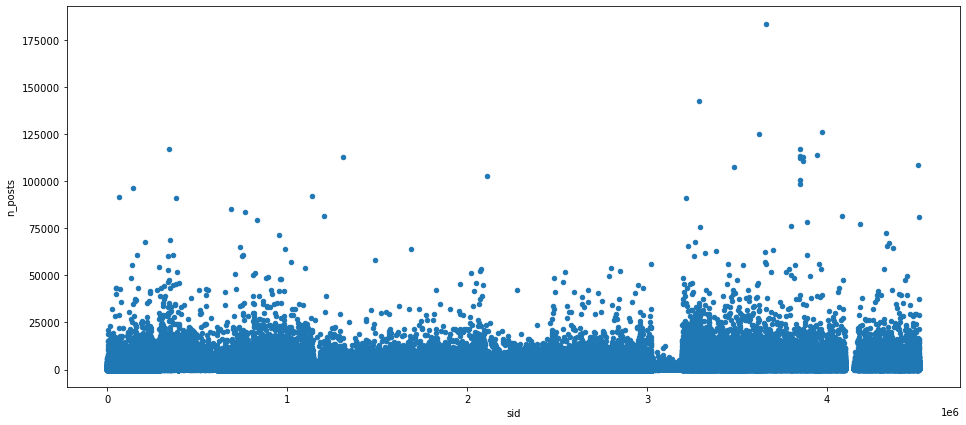

In [19]:
data_profiles.plot(kind = 'scatter', x = 'sid', y = 'n_posts', figsize =(16, 7))

In [23]:
data_posts = pd.DataFrame(data_posts)

In [27]:
data_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25.0,1.0
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9.0,0.0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4.0,0.0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42710192,28370925,-1,BcpWMWGBfxh,5.556457e+09,4.574268e+14,2017-12-13 15:38:04.000,1,Mm not bad but not so pretty😕\n#puthtroop#puth...,74.0,0.0
42710193,28370926,-1,Ba6LZWwlCl8,3.371865e+08,4.574268e+14,2017-10-31 11:28:01.000,1,🌸🌺,49.0,0.0
42710194,28370929,-1,BPN0kM1hYUw,3.289886e+09,4.574268e+14,2017-01-13 20:16:37.000,1,#pasanlosaños #creweedrepresent #SlgFamily,18.0,0.0
42710195,28370997,-1,BxsZ8nDBr-L,8.536366e+09,4.267235e+06,2019-05-20 20:07:52.000,1,Estão se divertindo?,27.0,1.0


In [32]:
maxLike = max(data_posts.numbr_likes)

In [33]:
minLike = min(data_posts.numbr_likes)

In [43]:
data_posts.iloc[int(maxLike)]

sid                               37126298
sid_profile                             -1
post_id                        BKLCSbvD8w2
profile_id                    3018083018.0
location_id              328544794588132.0
cts                2016-09-10 12:41:50.000
post_type                                1
description                            NaN
numbr_likes                          274.0
number_comments                        0.0
Name: 8822952, dtype: object

In [45]:
data_posts.iloc[int(minLike)]

sid                                                         28370919
sid_profile                                                  3496776
post_id                                                  BXdjjUlgcgq
profile_id                                              2237947779.0
location_id                                       1022366247837915.0
cts                                          2017-08-06 20:06:57.000
post_type                                                          2
description        Wreckloose! Deevalley bike park laps on the @i...
numbr_likes                                                     80.0
number_comments                                                  0.0
Name: 0, dtype: object

In [46]:
maxCom = max(data_posts.number_comments)

In [47]:
minCom = min(data_posts.number_comments)

In [48]:
data_posts.iloc[int(maxCom)]

sid                                                      28867486
sid_profile                                                    -1
post_id                                               BiYC0ihHDlm
profile_id                                              9893048.0
location_id                                           292720081.0
cts                                       2018-05-05 02:30:04.000
post_type                                                       1
description        Art Fest 2018 👑 #misssantafespringspageant2018
numbr_likes                                                 102.0
number_comments                                              11.0
Name: 488953, dtype: object

In [49]:
data_posts.iloc[int(minCom)]

sid                                                         28370919
sid_profile                                                  3496776
post_id                                                  BXdjjUlgcgq
profile_id                                              2237947779.0
location_id                                       1022366247837915.0
cts                                          2017-08-06 20:06:57.000
post_type                                                          2
description        Wreckloose! Deevalley bike park laps on the @i...
numbr_likes                                                     80.0
number_comments                                                  0.0
Name: 0, dtype: object

##### Since the maxLike sid and the minCom sid has the same amount of comments it is interensting to understand why it only shows one of them(how the pandas choose between them )

In [65]:
null_loc = pd.isnull(data_posts["location_id"])

In [66]:
data_posts[null_loc]

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
104582,28477597,327737,Bx-LwWNBLY8,3.622019e+06,NaN,2019-05-27 17:50:11.000,1,When your husband gets an accent out of nowhere?,128.0,20.0
192242,28565905,4070740,BxpEcKvgA09,2.881055e+08,NaN,2019-05-19 13:02:13.000,1,"Thirty, Flirty and Thriving 🎉💖🥂",19.0,0.0
203531,28577581,4462638,BrbQ-9bHxwb,9.724534e+08,NaN,2018-12-16 00:14:06.000,1,Life is so good😁,116.0,16.0
212616,28586815,4179979,Bx6f1tdgNfh,9.683140e+09,NaN,2019-05-26 07:28:43.000,1,Epic time celebrating B rads birthday no other...,24.0,0.0
230339,28604815,4046822,BvMPlOgjhIS,3.018851e+08,NaN,2019-03-19 14:18:49.000,1,Here’s a picture of a thing what we done befor...,49.0,1.0
...,...,...,...,...,...,...,...,...,...,...
42480557,26441720,3355552,BxYEucsB7pII5o7N_f17yCZCB02ZvUA8XdupLM0,2.697720e+08,NaN,2019-05-12 22:37:37.000,1,Bibi 💕,90.0,3.0
42480558,28139897,643709,ByAHgYfnVpMAfNjVWMXPOHtDF5lv4du5qYe5QA0,1.066670e+10,NaN,2019-05-28 11:51:32.000,1,NaN,3.0,0.0
42482801,25527023,643709,BxdI7lZnFum5m5hd5f6IZ1r7TF7mnPmkKfn2sw0,1.066670e+10,NaN,2019-05-14 21:52:08.000,1,NaN,7.0,2.0
42482802,25527024,643709,BuQ_IuaHJoutSlyNYTxk7cv_x1i2qMFaGxYqf40,1.066670e+10,NaN,2019-02-24 13:59:55.000,1,NaN,2.0,0.0


In [69]:
data_posts.location_id.isnull().sum()

12972772

In [70]:
data_posts.location_id.notnull().sum()

29737425

In [67]:
not_null_loc = pd.notnull(data_posts["location_id"])

In [68]:
data_posts[not_null_loc]

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25.0,1.0
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9.0,0.0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4.0,0.0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42710192,28370925,-1,BcpWMWGBfxh,5.556457e+09,4.574268e+14,2017-12-13 15:38:04.000,1,Mm not bad but not so pretty😕\n#puthtroop#puth...,74.0,0.0
42710193,28370926,-1,Ba6LZWwlCl8,3.371865e+08,4.574268e+14,2017-10-31 11:28:01.000,1,🌸🌺,49.0,0.0
42710194,28370929,-1,BPN0kM1hYUw,3.289886e+09,4.574268e+14,2017-01-13 20:16:37.000,1,#pasanlosaños #creweedrepresent #SlgFamily,18.0,0.0
42710195,28370997,-1,BxsZ8nDBr-L,8.536366e+09,4.267235e+06,2019-05-20 20:07:52.000,1,Estão se divertindo?,27.0,1.0


In order to show the null values and not null values we can try 2 way:
1.We can try to just call a column of the data set and use isnull().sum() and notnull().sum()
2.We can just slice into our dataframe get the perefered column and use the result for the details and #Rows

In [6]:
data_posts_int = data_posts.astype({'post_type':'int'})

In [7]:
data_posts_int

,sid_profile,profile_id,location_id,post_type,numbr_likes,number_comments
0,3496776,2.237948e+09,1.022366e+15,2,80.0,0.0
1,-1,5.579335e+09,4.574268e+14,1,25.0,1.0
2,-1,3.134296e+08,4.574268e+14,1,9.0,0.0
3,-1,1.837593e+09,4.574268e+14,1,4.0,0.0
4,-1,1.131527e+09,4.574268e+14,1,8.0,0.0
...,...,...,...,...,...,...
42710192,-1,5.556457e+09,4.574268e+14,1,74.0,0.0
42710193,-1,3.371865e+08,4.574268e+14,1,49.0,0.0
42710194,-1,3.289886e+09,4.574268e+14,1,18.0,0.0
42710195,-1,8.536366e+09,4.267235e+06,1,27.0,1.0


In [16]:
data_posts_int["post_type"]

0           2
1           1
2           1
3           1
4           1
           ..
42710192    1
42710193    1
42710194    1
42710195    1
42710196    1
Name: post_type, Length: 42710197, dtype: int64

In [104]:
v = 0
p = 0
for i in data_posts_int["post_type"]:
    if i ==1:
        p +=1
    if i ==2:
        v+=1
    if i ==3:
        v+=1

In [105]:
print(p,'#Photos',v,'#Videos')

41534486 #Photos 1175711 #Videos


In [106]:
display(data_profiles)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4509581,4184467,1.418322e+09,karenarkesteyn,Karen Arkesteyn,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,2.338990e+07,anwilms,An Wilms,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


In [117]:
data_profiles.dropna()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,cowley college volleyball\n3.18.19 @garrett.lange,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,Een vernieuwend vastgoedkantoor waarbij persoo...,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509561,3948501,7.633635e+09,successfullyscrewed,Successfully Screwed Podcast,"The podcast about getting over fuckups, bad de...",7484.0,1983.0,230.0,www.SuccessfullyScrewedPodcast.com,2019-07-15 00:22:49.065 -0400,True
4509562,841982,1.456652e+09,paulinasalach,Paulina,Culinary + travel experience creator | Co-foun...,3473.0,1695.0,374.0,www.spoonfoodtours.com,2019-03-26 23:17:13.333 -0400,False
4509568,4184427,5.431404e+09,thee.en.dingetjes,Thee & Dingetjes,Happiness is a cup of tea...\n#theebar #teasho...,556.0,397.0,222.0,www.theeendingetjes.com,2019-08-01 14:37:15.872 -0400,True
4509569,4184431,5.914080e+09,allessia.claes,Claes Allessia (N-VA),Uit Scherpenheuvel-Zichem.\nN-VA Politica | ww...,667.0,612.0,215.0,www.facebook.com/claesallessia,2019-08-01 14:37:33.451 -0400,True


In [9]:
inted = data_profiles['is_business_account']
inted = inted.dropna().astype(int)
t,b,isntb = 0,0,0
for i in inted:
    t +=1
    if i == 1:
        b +=1
    if i == 0:
        isntb +=1

In [4]:
b

855254

In [5]:
isntb

2590069

In [6]:
t

3445323

In [7]:
print(b/t * 100)

24.823623213266217


In [8]:
print(isntb/t * 100)

75.17637678673378


### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


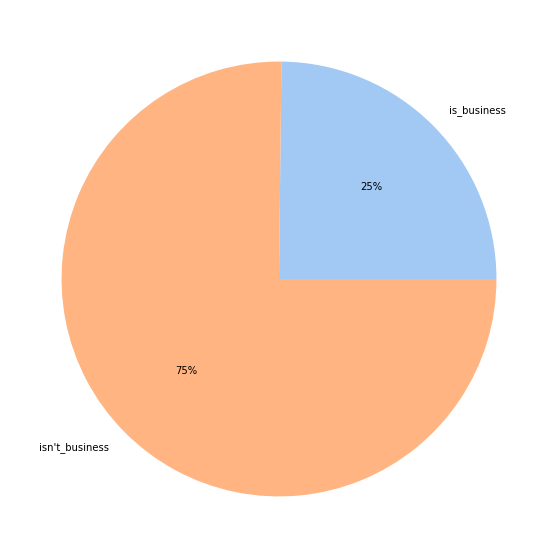

In [89]:
inted = data_profiles['is_business_account']
inted = inted.dropna().astype(int)
t,b,isntb = 0,0,0
for i in inted:
    t +=1
    if i == 1:
        b +=1
    if i == 0:
        isntb +=1
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15,10))

data = b,isntb
labels = ["is_business","isn't_business"] 
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# RQ3

In [23]:
data_posts

,sid_profile,profile_id,location_id,cts,post_type,numbr_likes,number_comments
0,3496776,2.237948e+09,1.022366e+15,2017-08-06 20:06:57,2,80.0,0.0
1,-1,5.579335e+09,4.574268e+14,2017-06-19 09:31:16,1,25.0,1.0
2,-1,3.134296e+08,4.574268e+14,2017-03-11 20:05:03,1,9.0,0.0
3,-1,1.837593e+09,4.574268e+14,2016-09-13 16:27:16,1,4.0,0.0
4,-1,1.131527e+09,4.574268e+14,2015-10-18 10:19:27,1,8.0,0.0
...,...,...,...,...,...,...,...
42710192,-1,5.556457e+09,4.574268e+14,2017-12-13 15:38:04,1,74.0,0.0
42710193,-1,3.371865e+08,4.574268e+14,2017-10-31 11:28:01,1,49.0,0.0
42710194,-1,3.289886e+09,4.574268e+14,2017-01-13 20:16:37,1,18.0,0.0
42710195,-1,8.536366e+09,4.267235e+06,2019-05-20 20:07:52,1,27.0,1.0


In [34]:
count_hours = Counter(data_posts.cts.dt.hour)
# count_hours = pd.DataFrame.from_dict(count_hours, orient='index')
count_hours

Counter({20.0: 2495269,
         9.0: 1434724,
         16.0: 2341052,
         10.0: 1571222,
         18.0: 2486381,
         17.0: 2423768,
         22.0: 2167378,
         11.0: 1720602,
         21.0: 2414932,
         13.0: 2025569,
         23.0: 1838215,
         0.0: 1547036,
         15.0: 2263009,
         14.0: 2158976,
         19.0: 2499758,
         8.0: 1267423,
         6.0: 1011923,
         2.0: 1290434,
         4.0: 1135290,
         1.0: 1376147,
         5.0: 1044289,
         3.0: 1231644,
         12.0: 1868544,
         7.0: 1093280,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         

### What is the most common time in which users publish their posts?

<BarContainer object of 3356 artists>

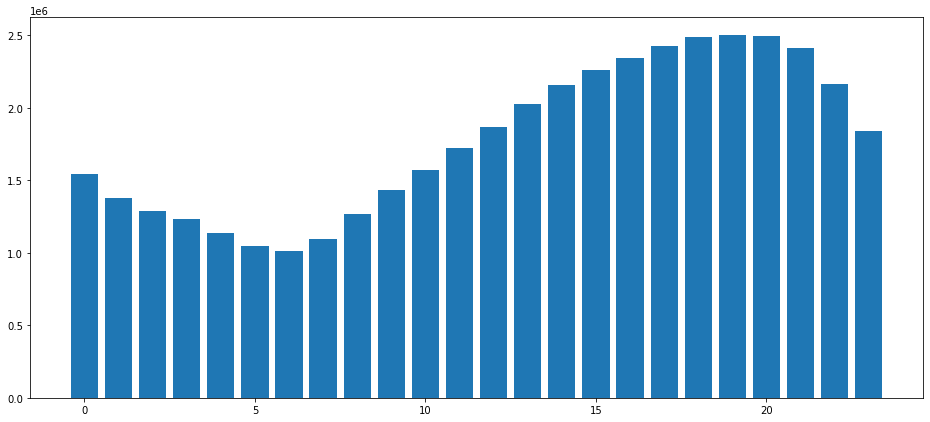

In [48]:
plt.figure(figsize=(16,7))
plt.bar(count_hours.keys(), count_hours.values())

Based on the statistical data from above bar plot we can understand that most users post their content between 15-20 in a 24h since bars show increment in the number of posts 

### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.


In [89]:


def plot_posts_intervals(posts: pd.DataFrame, intervals):
    
    intervals.sort()
    interval_labels = list(map(lambda start_end: f"{start_end[0]} - {start_end[1]}", intervals))
    number_of_posts = np.array([_find_number_of_posts_between(posts, start, end) for start, end in intervals])
    
    interval_labels = interval_labels[::-1]
    number_of_posts = number_of_posts[::-1]
    plt.barh(interval_labels, number_of_posts)
    plt.title("Number of posts per time interval")
    plt.xlabel("Number of posts")
    plt.ylabel("Time interval")
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
def _find_number_of_posts_between(posts: pd.DataFrame, start_time, end_time):
    return len(find_posts_between(posts, start_time, end_time))

In [88]:
intervals = dict(itertools.islice(count).items(), 1 ,3))
plot_posts_intervals(data_posts.cts.dt.hour,intervals)

ValueError: could not convert string to Timestamp

<AxesSubplot:xlabel='sid', ylabel='n_posts'>

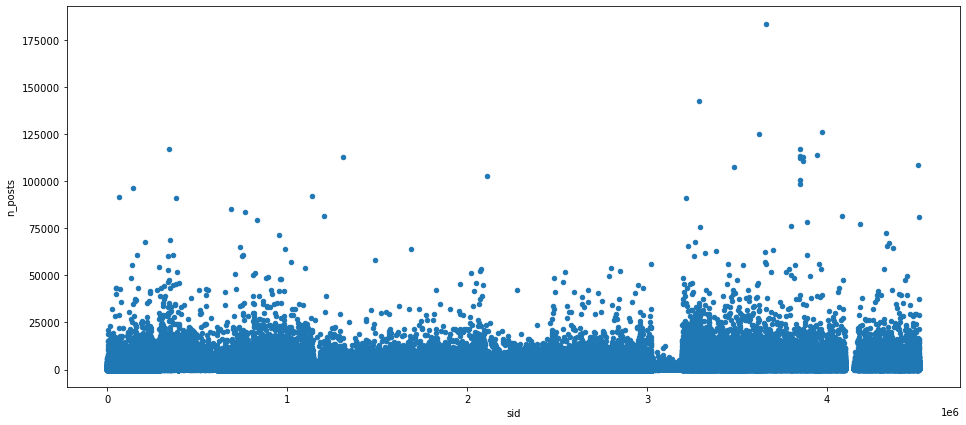

In [20]:
data_profiles.plot(kind = 'scatter', x = 'sid', y = 'n_posts',figsize =(16, 7))

In [147]:
def postForId(profile_id):
    for i in data_posts['profile_id']:
        if i == profile_id:
            print(data_posts.iloc[data_posts.post_id])
            return data_posts.iloc[data_posts.post_id]      

In [148]:
postForId(3496776)

In [324]:
df = pd.DataFrame(data_profiles[['n_posts','profile_id']])
df_sorted = df.sort_values(by=["n_posts"], ascending=False) 

In [325]:
def topN(n):
        print(df_sorted[0:n])

In [326]:
topN(10)

          n_posts    profile_id
2571453  142428.0  8.563367e+09
4219642  117262.0  1.607309e+09
4313908  113780.0  1.603890e+09
4219476  113182.0  2.181730e+08
4236057  112777.0  2.855497e+08
1631526  112723.0  8.312603e+09
4219551  112260.0  1.701679e+09
4236238  110919.0  5.850795e+08
320936   108785.0  5.571601e+06
4219550  100485.0  1.703992e+09


In [283]:
top10 = []
sorted_profiles = df_sorted[0:10]
for i in sorted_profiles['profile_id']:
    top10.append(i)
#     sorted_profiles.loc[i].astype(int)
#     print(sorted_profiles.loc[i].numbr_likes

In [285]:
df2 = pd.DataFrame(data_posts[['numbr_likes','number_comments','profile_id']])

In [299]:
df2

,numbr_likes,number_comments,profile_id
0,80.0,0.0,2.237948e+09
1,25.0,1.0,5.579335e+09
2,9.0,0.0,3.134296e+08
3,4.0,0.0,1.837593e+09
4,8.0,0.0,1.131527e+09
...,...,...,...
42710192,74.0,0.0,5.556457e+09
42710193,49.0,0.0,3.371865e+08
42710194,18.0,0.0,3.289886e+09
42710195,27.0,1.0,8.536366e+09


In [298]:
for i in top10:
    if i == df2.profile_id:
        print(yes)
#         avrage = df2.numbr_likes + df2.number_comments / 10
# print(avrage)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Fix Time and RQ4 ( last 2 ) also df['points'].mean() to get mean of likes and coms

### [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity. 
* Plot the top 10 most popular users in terms of followers and their number of posts.
Who is the most influential user?
Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.


In [8]:
profiles_sorted = data_profiles.sort_values(by=['followers'], ascending=False) #Sorting by number of followers

profiles_sorted = profiles_sorted.head(10)

print(profiles_sorted.profile_name.head(10)) #prints 10most popular user

2880218          instagram
2582507    victoriassecret
3820939                nba
701965        louisvuitton
2414951      buzzfeedtasty
2785241     andresiniesta8
333193                  hm
3934581    princessyahrini
1311970       danbilzerian
1703764        akshaykumar
Name: profile_name, dtype: object


In [ ]:
names = list(profiles_sorted.profile_name.values[0:9])
posts = list(profiles_sorted.n_posts)
  
# fig = plt.figure(figsize = (10, 5))
profiles_sorted.plot.bar(x='profile_name', y='n_posts', rot=0)

<BarContainer object of 141 artists>

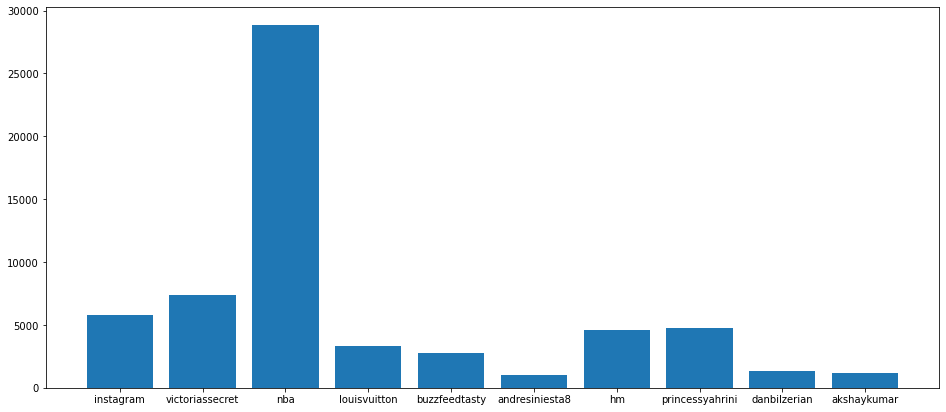

In [51]:
fig, ax = plt.subplots(figsize =(16, 7))
plt.bar(profiles_sorted.profile_name,profiles_sorted.n_posts)

### Most Influntial User

In [24]:
mostInflu = max(profiles_sorted.profile_name.head(1)) #takes the most influential user(max number of profiles)
print(mostInflu , 'is Most influntial user') #prints the information for the most influential user  

instagram is Most influntial user


### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [9]:
#Trying to merge to dataframe by their profile name
data_posts = dt.fread(r"/Users/navidabasi/Desktop/instagram_posts.csv", sep="\t", columns = {"sid_profile","profile_id","location_id","post_type","numbr_likes","number_comments"}).to_pandas()
# topTen_locations = profiles_sorted.merge(data_posts, on = 'profile_id')
topTen_locations = pd.merge(profiles_sorted, data_posts)

In [55]:
display(topTen_locations)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account,sid_profile,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,5.332856e+06,1,125428.0,1240.0
1,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,4.292640e+05,1,733087.0,3092.0
2,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,2.206190e+08,1,679117.0,6972.0
3,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,1.021255e+09,1,1274685.0,7360.0
4,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,,False,336492,2.361753e+06,1,1455368.0,8727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,607646.0,4391.0
137,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,1115544.0,7483.0
138,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,NaN,1,1275127.0,3939.0
139,3513205,907025384.0,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False,3513205,1.653066e+15,1,382877.0,654.0


### * How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [89]:
post_type_counter = (topTen_locations.post_type == 1)
count = post_type_counter.sum()
total = 141
print(f"{count},of posts contains only photos that is about , {count/total * 100: .2f}, percent")

128,of posts contains only photos that is about ,  90.78, percent


In [88]:
post_type_counter = (topTen_locations.post_type == 2)
count = post_type_counter.sum()
total = 141
print(f"{count} of posts contains only reels that is about , {count/total * 100: .2f} percent")

13 of posts contains only reels that is about ,  9.22 percent


In [74]:
post_type_counter = (topTen_locations.post_type == 3)
count = post_type_counter.sum()
total = 141
print(count/total * 100)

0.0


There are 128 Posts that only contains photos and 13 posts that only contains reels and also No post that contains both photo and video for the first 10 popular accounts

### * How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [45]:
post_topTen_likes = topTen_locations.groupby(['profile_name','followers','post_type'],sort= False)['numbr_likes'].sum()

In [46]:
post_topTen_likes

profile_name     followers    post_type
instagram        285457645.0  1            28083937.0
                              2             1780229.0
victoriassecret  65269440.0   1             1153749.0
                              2              522816.0
nba              35339708.0   1             3149064.0
                              2             1036478.0
louisvuitton     30689316.0   1              186857.0
buzzfeedtasty    30246783.0   1             1311218.0
andresiniesta8   29542143.0   1             5676272.0
hm               29176804.0   1              162427.0
princessyahrini  29042823.0   1             3263087.0
                              2              125291.0
danbilzerian     26476004.0   1            12946699.0
akshaykumar      26252169.0   1            13352324.0
Name: numbr_likes, dtype: float64

In [52]:
topTen_locations.profile_name

0        instagram
1        instagram
2        instagram
3        instagram
4        instagram
          ...     
136    akshaykumar
137    akshaykumar
138    akshaykumar
139    akshaykumar
140    akshaykumar
Name: profile_name, Length: 141, dtype: object

In [74]:
total,p,v = 0,0,0
for i in topTen_locations:
    total+=1
for i in topTen_locations.post_type:
    if i == 1:
        p+=1
    if i == 2:
        v+=1
        
total = v + p
print(f'The average number of likes for top ten profiles containing photos is{p/total *100 : .2f} and average for number of like in posts containing only reels is{v/total *100 : .2f}')

The average number of likes for top ten profiles containing photos is 90.78 and average for number of like in posts containing only reels is 9.22


In [75]:
def avgLike(profile_name):
    rows = post_topTen_likes[post_topTen_likes.profile_name == profile_name] #comparing only rows that are wanted
    
    photo = rows[rows.post_type == 1].numbr_likes.sum() #summing likes for the wanted rows (only photos)
    reels = rows[rows.post_type == 2].numbr_likes.sum() #summing likes for the wanted rows (only reels)
    
    total = rows.n_posts.sum()
    return photo/total, reels/total

In [82]:
profile_list = [] 
for i in topTen_locations.profile_name:
    profile_list.append(i)

### [RQ6] It's time to get information from the user posting effectiveness

### * What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [100]:
print(data_posts.cts.dt.hour.mean())
avgMinDay = data_posts.cts.dt.hour.mean()*60
avgMinDay

13.188672992035356


791.3203795221214

In [106]:
dates = dt.fread(r"/Users/navidabasi/Desktop/instagram_posts.csv", sep = '\t', columns={'cts','profile_id'}).to_pandas()

In [111]:
dates.head(10)

,profile_id,cts
0,2.237948e+09,2017-08-06 20:06:57
1,5.579335e+09,2017-06-19 09:31:16
2,3.134296e+08,2017-03-11 20:05:03
3,1.837593e+09,2016-09-13 16:27:16
4,1.131527e+09,2015-10-18 10:19:27
5,1.626239e+07,2018-12-14 18:16:15
6,3.567387e+07,2018-08-09 17:53:46
7,8.408734e+08,2018-08-23 22:00:59
8,3.299940e+05,2015-05-14 11:02:05
9,3.607965e+08,2017-01-30 17:52:01


In [116]:
dates.duplicated().sum()

248669

In [119]:
duplicated_id = dates.duplicated() #returns boolean list

In [121]:
duplicated_values = dates.loc[dates.duplicated(), :]
duplicated_values.head()

,profile_id,cts
5758,9.441826e+09,2019-04-17 13:05:45
187245,3.660090e+09,2019-02-26 09:21:50
421973,4.077143e+09,2019-05-13 07:48:03
447297,5.398758e+08,2019-03-15 14:01:41
552186,4.631540e+06,2016-08-27 16:22:10


In [139]:
count_dates = Counter(data_posts.cts.dt.date)
count_dates

Counter({datetime.date(2017, 8, 6): 10375,
         datetime.date(2017, 6, 19): 6257,
         datetime.date(2017, 3, 11): 5520,
         datetime.date(2016, 9, 13): 2762,
         datetime.date(2015, 10, 18): 1579,
         datetime.date(2018, 12, 14): 43199,
         datetime.date(2018, 8, 9): 20259,
         datetime.date(2018, 8, 23): 22978,
         datetime.date(2015, 5, 14): 854,
         datetime.date(2017, 1, 30): 4767,
         datetime.date(2017, 8, 10): 8242,
         datetime.date(2019, 5, 27): 272762,
         datetime.date(2019, 5, 25): 331597,
         datetime.date(2019, 5, 24): 288795,
         datetime.date(2019, 5, 5): 427803,
         datetime.date(2019, 3, 2): 148442,
         datetime.date(2019, 4, 29): 248456,
         datetime.date(2018, 10, 12): 28648,
         datetime.date(2019, 2, 8): 86061,
         datetime.date(2019, 3, 15): 133855,
         datetime.date(2019, 5, 16): 289189,
         datetime.date(2019, 5, 4): 361636,
         datetime.date(2019, 5, 9)

In [140]:
#taking avg posts per date

In [137]:
unix = pd.to_datetime(duplicated_values.cts.dt.date).astype(int) / 10**9 #convert to unix and sum for each profile_id and calculating avg

for i in duplicated_values:
    print(duplicated_values.cts.dt.hour.mean() )
    print(unix.mean())
    


5758        1.555459e+09
187245      1.551139e+09
421973      1.557706e+09
447297      1.552608e+09
552186      1.472256e+09
                ...     
42495350    1.557533e+09
42535282    1.558742e+09
42586457    1.513037e+09
42637673    1.545869e+09
42649344    1.533254e+09
Name: cts, Length: 248669, dtype: float64

Avrage time for all users based on the number of all posts in 24h is 13hours or 791min which is equal to 0 day and 791min from 00:00

In [13]:
df = pd.DataFrame(data_profiles[['n_posts','profile_id','cts']])

sorted_n_posts = df.sort_values(by=['n_posts'], ascending=False) 
#sorting for top3 user, users with mose posts should publish posts more frequently than others

In [27]:
display(sorted_n_posts[0:3]) #top 3
display(sorted_n_posts.loc[3990313])
display(sorted_n_posts.loc[2571453])
display(sorted_n_posts.loc[4338921])

,n_posts,profile_id,cts
3990313,183730.0,1.996648e+08,2019-06-30 19:14:19.780000-04:00
2571453,142428.0,8.563367e+09,2019-05-07 00:14:06.799000-04:00
4338921,126340.0,1.273455e+09,2019-07-15 10:00:51.171000-04:00


n_posts                               183730.0
profile_id                         199664772.0
cts           2019-06-30 19:14:19.780000-04:00
Name: 3990313, dtype: object

n_posts                               142428.0
profile_id                        8563366588.0
cts           2019-05-07 00:14:06.799000-04:00
Name: 2571453, dtype: object

n_posts                               126340.0
profile_id                        1273455368.0
cts           2019-07-15 10:00:51.171000-04:00
Name: 4338921, dtype: object

In [17]:
sorted_n_posts[0:2].cts.mean()

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.



## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.



* Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.


<AxesSubplot:xlabel='numbr_likes', ylabel='number_comments'>

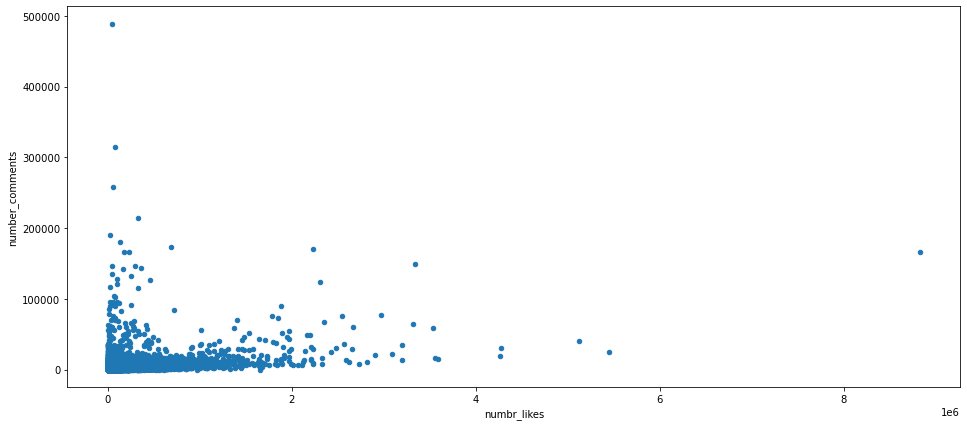

In [83]:
data_posts.plot(kind = 'scatter', x = 'numbr_likes', y = 'number_comments', figsize =(16, 7))

Based on the observations of the above graph I don't see any significant changes on the number of comments a post gets while simultaneously increasing the number of likes it gets.

* Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

TypeError: 'value' must be an instance of str or bytes, not a float

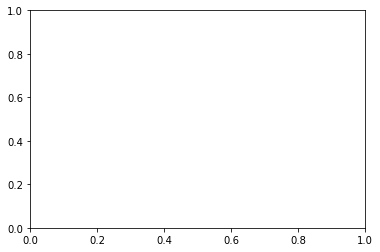

In [30]:
data_posts.plot(kind = 'scatter', x = 'profile_id', y = 'cts')

In [ ]:
data_posts.plot(kind = 'scatter', x = 'profile_id', y = 'numbr_likes')

In [ ]:
data_posts.plot(kind = 'scatter', x = 'profile_id', y = 'number_comments')

I want to use another approch which is using a library called seaborn and use a hue over the likes and comments

In [ ]:
sns.lineplot(data=df, x='numbr_likes', y='number_comments', hue='cts')
plt.tight_layout()
plt.show()

### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.


In [14]:
dist =dt.fread(r"/Users/navidabasi/Desktop/instagram_profiles.csv", sep = '\t', columns={'profile_id', 'followers'}).to_pandas()
dist = dist.dropna()

In [15]:
dist

,profile_id,followers
0,4.721050e+09,146.0
1,5.905830e+08,1145.0
2,1.074147e+09,324.0
5,1.450642e+08,192.0
6,2.061868e+09,4137.0
...,...,...
4509578,4.038738e+09,809.0
4509579,1.840612e+08,599.0
4509580,4.070370e+09,261.0
4509581,1.418322e+09,481.0


In [14]:
followers =dt.fread(r"/Users/navidabasi/Desktop/instagram_profiles.csv", sep = '\t', columns={'followers'}).to_pandas()
followers = followers.dropna()
followers=followers.apply(lambda x: x+1)
followers=followers.apply(np.log)

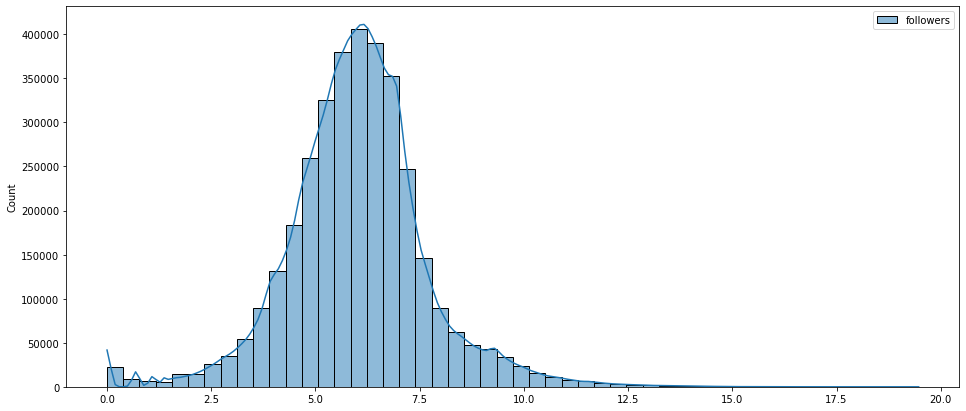

In [15]:
fig, ax = plt.subplots(figsize =(16, 7))
sns.histplot(followers,bins=50,kde=True)
plt.show()

In [18]:
distri_followers= data_profiles.followers
distri_followers = distri_followers.dropna()

In [19]:
# mean, mode, and quantiles
# print('The mean of followers is:')
followers_mean = np.mean(distri_followers)
followers_mode=statistics.mode(distri_followers)


first_quantile = np.quantile(distri_followers,0.25)
third_quantile = np.quantile(distri_followers,0.75)

print(followers_mean, 'The mean(average) of the followers per each account is 4700')
print(followers_mode, 'The mode (the value that appears the most often in a data set and it can be used as a measure of central)', end='')
print('tendency, like the median and mean')
print('\n')
print('The mode shows that most values in the dataset are 0 which means that most users in this dataset have zero followers')
print(first_quantile, 'The first quantile of the dataset')
print(third_quantile, 'The third quantile of the dataset')

# Quantiles are points in a distribution that relate to the rank order of values in that distribution.
# For a sample, you can find any quantile by sorting the sample. The middle value of the sorted sample 
# (middle quantile, 50th percentile) is known as the median. The limits are the minimum and maximum values.

4739.899180397426 The mean(average) of the followers per each account is 4700
0.0 The mode (the value that appears the most often in a data set and it can be used as a measure of central)tendency, like the median and mean


The mode shows that most values in the dataset are 0 which means that most users in this dataset have zero followers
159.0 The first quantile of the dataset
974.0 The third quantile of the dataset


### What are histograms, bar plots, scatterplots and pie charts used for? What insights can you extract from a Box Plot?

A histogram is a type of graph that shows the distribution of data in unique categories, an easy example to show the power of histograph is the comparison between two graph in a period of time a histogram can easily shows decent or any visual change over a period of time in comparison with some other types like A pie chart

each of graph types will be used in similar or different scenarios, a box plot shows the average and max and min values in one observation while a pie chart is useful when we are dealing with distributions like amount or percentage.

a scatterplot well same as others can shows distribution of values while give us a comparable view between values ( by shwoing dots that are projected way out of clusters, while this in a box plot is not available, a scatterplot can easily shows the density of the data )

## Command Line Question

Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also does not use as much CPU processing time as other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

In this question, you should use command line tools such as grep and possibly other commands to answer the following question:

Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)
Note: You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable.

#### what is grep?


The grep command can search for a string in groups of files. When it finds a pattern that matches in more than one file, it prints the name of the file, followed by a colon, then the line matching the pattern.

## Algorithmic Question


### [AQ1] Given the following pseudocode, answer the questions:

### What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

The idea behind this algorithm is to swap the character of a sequence( or a list ) till the end of the of
The first Algorithm explains that we start from indx 0 and grow its value till for the range of the sequence more likely (range method in the python, without the rotation)

The second Algorithm explain the process in more details, first it makes sure that our start and ending ints are not the same (like a sequence of one character) then it starts the process by temprorarly changing the indx of first value with the right one and add 1 to the indx (i) and repeats the same process till the end indx reaches. By a web search it is called Permutations Algorithm

### What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?


Since the algorithm only contains 2 loops and the statements in the loops are basic the Big O for the algorithm is (number of times loop repeats) * (complexity of the statement) = n(O(n)), in addition since the algo containes a if-else (conditional statement) and since Big O for conditionals is n log n then the complexity will be n(O(n)) + n log n

### Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?


## [AQ2] Considering the following problem, answer the questions:


### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions: 
* Each piece of the cut should have an integer length 
* He should at least cut the ribbon once 
* The multiplication of the length of all the pieces be the maximum possible

Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.